# Introduction
In this notebook we'll be **implementing** K-Means Clustering algorithm ***manually* without using a library** and then compress images using that.

If you find it helpful, please ***upvote*** the notebook, it keeps me motivated.

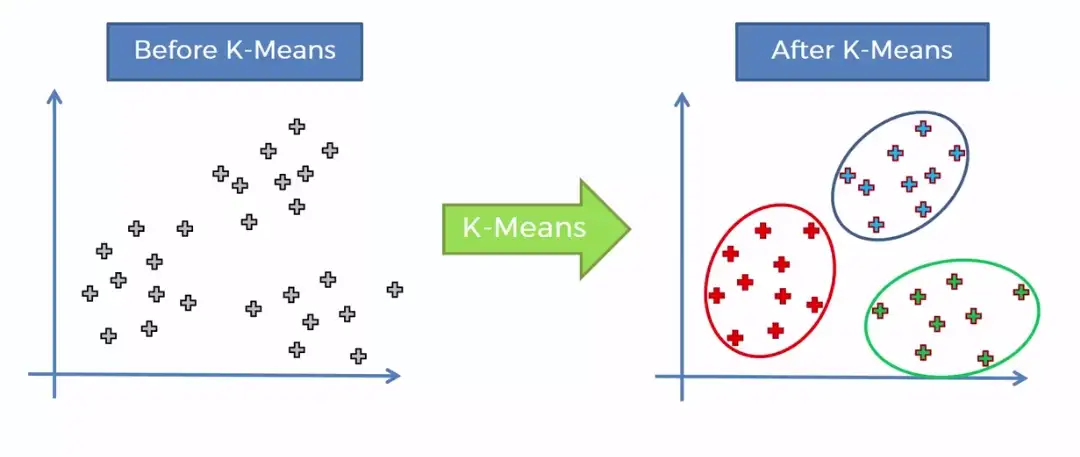

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# K-Means Clustering Algorithm
* K-means is an iterative procedure that
     * Starts by *guessing the initial centroids*, and then 
     * Refines this guess by 
         * Repeatedly *assigning examples to their closest centroids*, and then 
         * *Recomputing the centroids* based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K = number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


# Loading Image

In [2]:
# Load an image of a giraffe
original_img = plt.imread('/kaggle/input/images/giraffe.png')

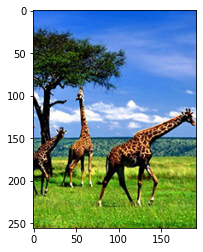

In [3]:
# Visualizing the image
plt.imshow(original_img)

# Implementing Algorithm Helper Functions

- find_closest_centroids( )
- compute_centroids( )
- kMeans_init_centroids( )
- run_kMeans( )

In [4]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    Returns:
        idx (array_like): (m,) closest centroids    
    """
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):        
        dist = np.zeros(K)
        for j in range(K):
            temp = X[i] - centroids[j]
            dist[j] = np.linalg.norm(temp)    
        idx[i] = np.argmin(dist)
    
    return idx

In [5]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each example in X. 
                            Concretely, idx[i] contains the index of the centroid closest to example i
        K (int):   number of centroids
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    return centroids

In [6]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be used in K-Means on the dataset X
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    Returns:
        centroids (ndarray): Initialized centroids
    """
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [7]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

# Image compression with K-means
* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will *reduce the number of
colors to 16 colors*.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

Shape of original_img is: (256, 192, 3)


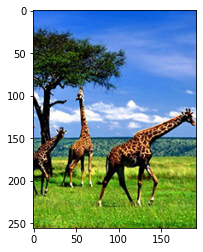

In [8]:
# Visualizing the image
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

In [9]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels(in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [10]:
# Run your K-Means algorithm on this data
K = 16           # no. of colors              
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [11]:
# Represent image in terms of indices
X_recovered = centroids[idx] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

# Output

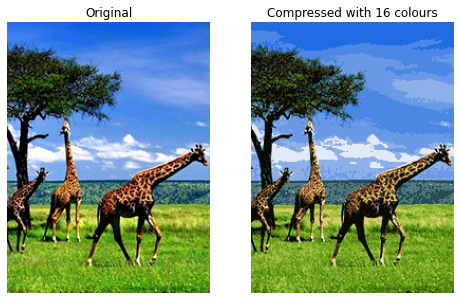

In [12]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255) # multiplying by 255 becoz above we've divided values by 255
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

If we **save the above outputs** using the following code
```
plt.imsave('giraffe_original.png', original_img*255)
plt.imsave('giraffe_compressed_16.png', X_recovered*255)
```
We'll see that the size of image has been compressed (in this case nearly by 5 times). <br>
I have attached a screenshot below showing the sizes of outputs.

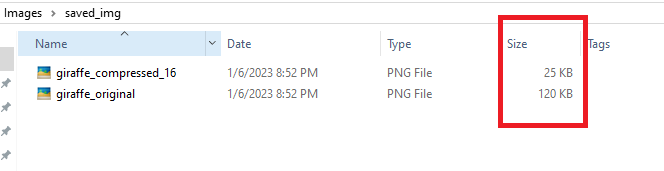

## Some Other Compressed Images

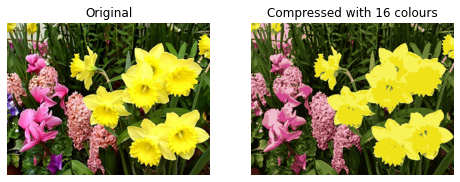
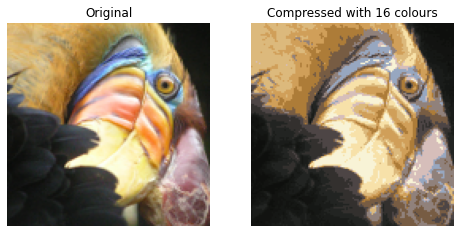

# Conclusion
Here we've implemented K-Means Clustering Algorithm completely from scratch and used it to compress images.<br>
Hope you find it helpful, do *Upvote*.

If you like to implement using built-in libraries (like sklearn.cluster), check here
https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb